In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/main/user94403143_workout_history.csv')

In [3]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
0,"April 19, 2022","April 19, 2022",Run,650,5.01831,2863,9.49590,8.59631,6.31851,6.97974,152.0,7656.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6522224401
1,"April 18, 2022","April 18, 2022",Run,407,3.09845,1766,9.48472,8.60469,6.32596,6.97294,153.0,4696.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6520116703
2,"April 19, 2022","April 17, 2022",Run,414,3.10000,1800,9.67742,0.00000,6.20000,0.00000,NaN,4781.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6523663267
3,"April 16, 2022","April 15, 2022",Run,405,3.10000,1694,9.10753,0.00000,6.58796,0.00000,NaN,4527.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6515709280
4,"April 15, 2022","April 15, 2022",Run,312,2.33625,1384,9.86227,7.92146,6.08379,7.57436,151.0,3557.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6515052958


In [4]:
data.shape

(645, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          645 non-null    object 
 1   Workout Date            645 non-null    object 
 2   Activity Type           645 non-null    object 
 3   Calories Burned (kCal)  645 non-null    int64  
 4   Distance (mi)           645 non-null    float64
 5   Workout Time (seconds)  645 non-null    int64  
 6   Avg Pace (min/mi)       645 non-null    float64
 7   Max Pace (min/mi)       645 non-null    float64
 8   Avg Speed (mi/h)        645 non-null    float64
 9   Max Speed (mi/h)        645 non-null    float64
 10  Avg Heart Rate          425 non-null    float64
 11  Steps                   621 non-null    float64
 12  Notes                   645 non-null    object 
 13  Source                  645 non-null    object 
 14  Link                    645 non-null    ob

In [6]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(data['Distance (mi)'])
data['target'] = labels
data.drop(columns=['Link', 'Source', 'Notes'], axis=1, inplace=True)

In [7]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,target
0,"April 19, 2022","April 19, 2022",Run,650,5.01831,2863,9.49590,8.59631,6.31851,6.97974,152.0,7656.0,434
1,"April 18, 2022","April 18, 2022",Run,407,3.09845,1766,9.48472,8.60469,6.32596,6.97294,153.0,4696.0,256
2,"April 19, 2022","April 17, 2022",Run,414,3.10000,1800,9.67742,0.00000,6.20000,0.00000,NaN,4781.0,265
3,"April 16, 2022","April 15, 2022",Run,405,3.10000,1694,9.10753,0.00000,6.58796,0.00000,NaN,4527.0,265
4,"April 15, 2022","April 15, 2022",Run,312,2.33625,1384,9.86227,7.92146,6.08379,7.57436,151.0,3557.0,190


In [8]:
data.isnull().sum()

Date Submitted              0
Workout Date                0
Activity Type               0
Calories Burned (kCal)      0
Distance (mi)               0
Workout Time (seconds)      0
Avg Pace (min/mi)           0
Max Pace (min/mi)           0
Avg Speed (mi/h)            0
Max Speed (mi/h)            0
Avg Heart Rate            220
Steps                      24
target                      0
dtype: int64

In [9]:
data.describe()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,target
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,425.000000,621.000000,645.000000
mean,393.049612,3.044918,2429.751938,13.271426,2.191823,5.411256,46.007613,104.322353,5513.689211,247.206202
std,288.024494,2.015396,4882.416730,19.561475,8.085837,1.865831,136.316361,63.852957,10274.613925,138.462025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,215.000000,1.830820,1358.000000,9.014030,0.000000,4.568560,0.000000,0.000000,3126.000000,137.000000
50%,402.000000,3.100000,1799.000000,9.712370,0.867689,6.120000,14.253900,136.000000,4648.000000,265.000000
75%,453.000000,3.520000,2331.000000,11.429900,1.762270,6.553970,59.826800,153.000000,5761.000000,352.000000
max,2473.000000,13.481600,80568.000000,295.261503,182.396000,14.863700,1853.550000,169.000000,193886.000000,499.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Activity Type', ylabel='count'>

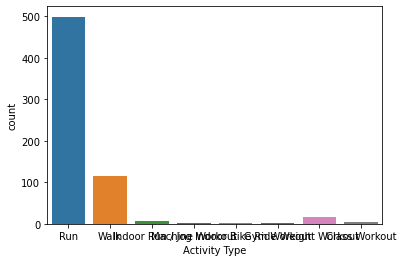

In [12]:
sns.countplot(x='Activity Type', data=data)

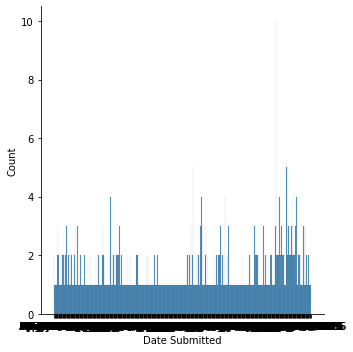

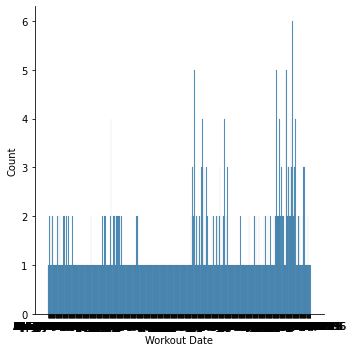

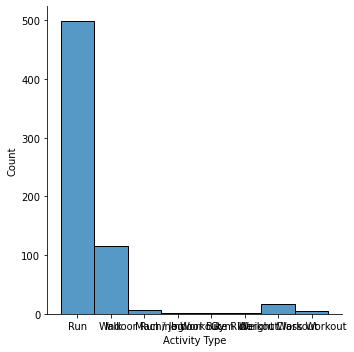

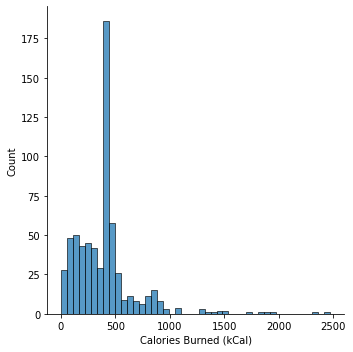

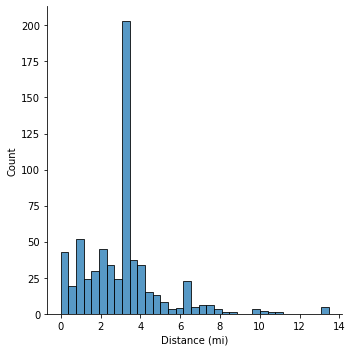

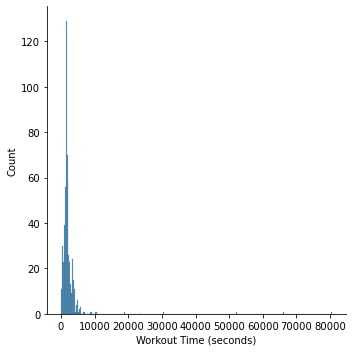

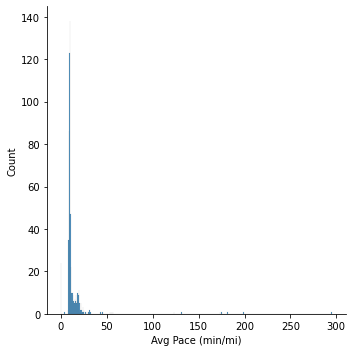

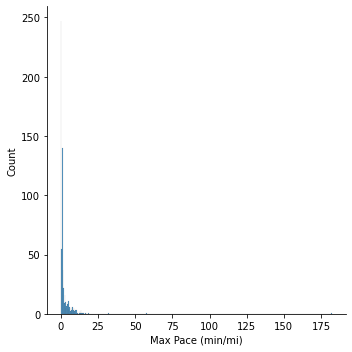

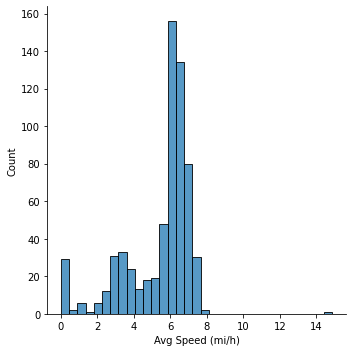

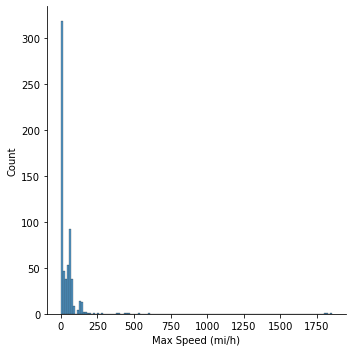

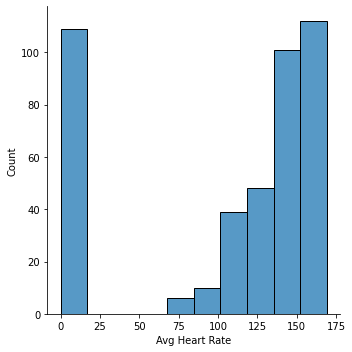

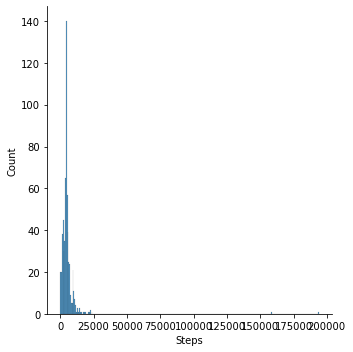

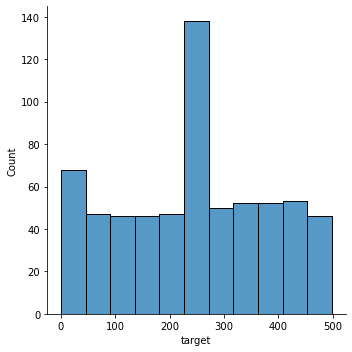

In [13]:
for column in data:
    sns.displot(x=column, data=data)

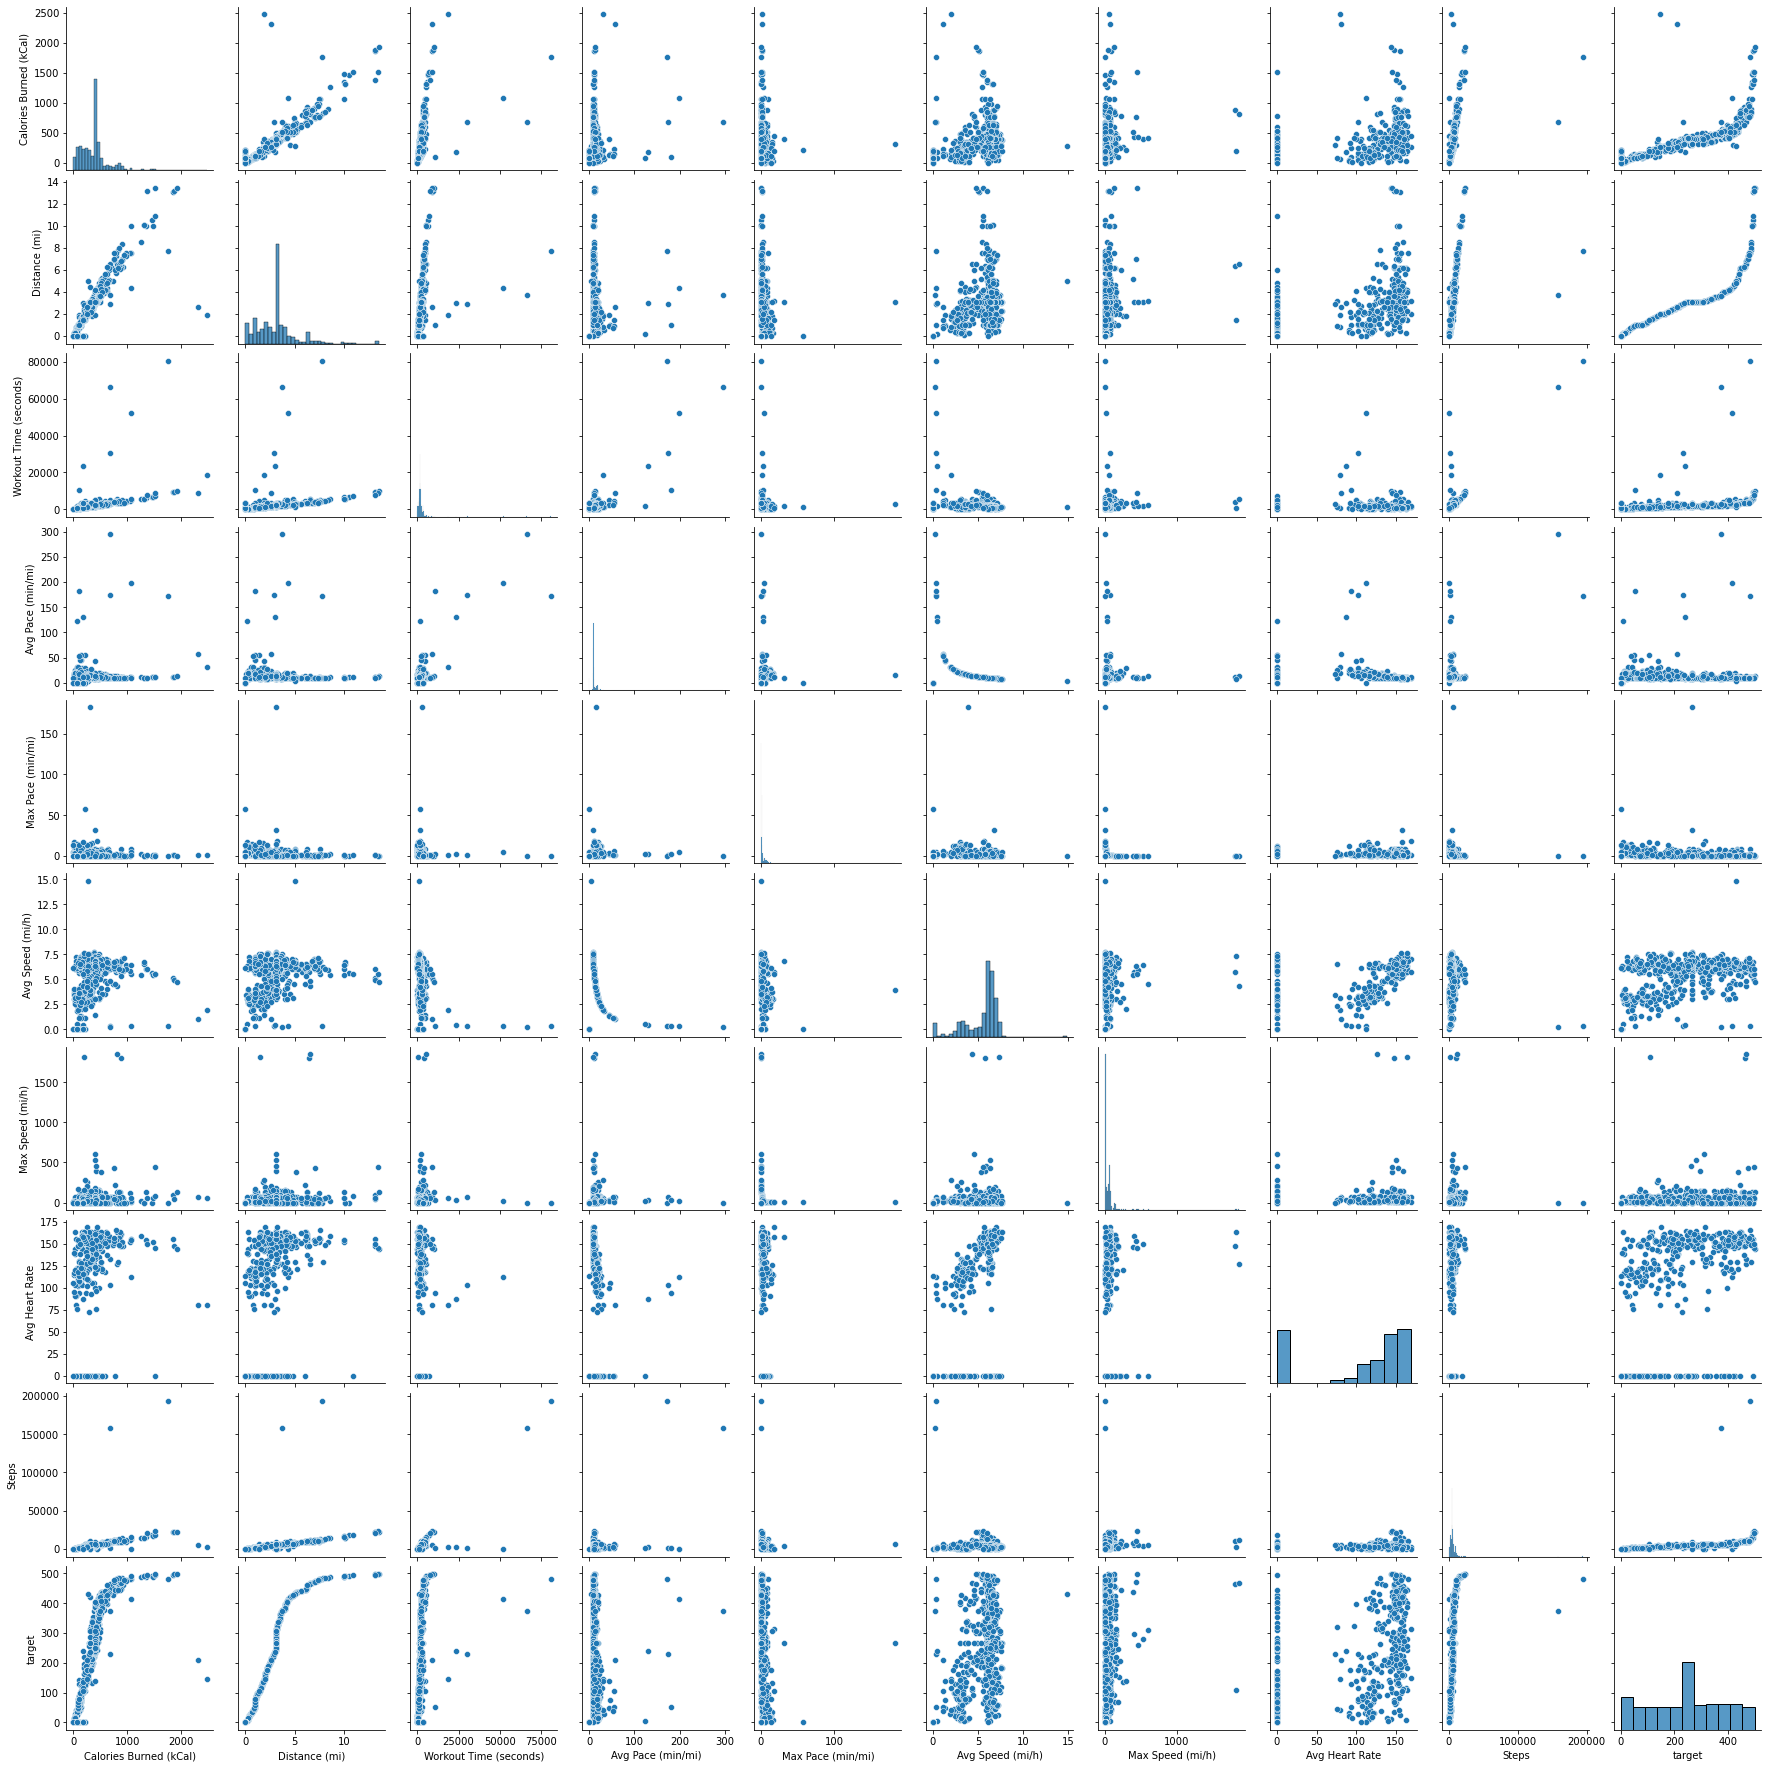

In [14]:
sns.pairplot(data)